In [1]:
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
from ucimlrepo import fetch_ucirepo 
from model_init import model_list
from train import train_models
from eval import eval_models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
  
# fetch dataset 
musk = fetch_ucirepo(id=75) 

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

In [3]:
# data (as pandas dataframes) 
X = musk.data.features 
Y = musk.data.targets 

### Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

scaler = StandardScaler()
for feature in X:
    if ((X[feature] < 0).any() or (X[feature] > 1).any()):
            X[feature] = scaler.fit_transform(X[[feature]])
            X[feature] = scaler.fit_transform(X[[feature]])

### Concatenating Dataframe

In [5]:
df = pd.concat([X, Y], axis = 1)

### Finding correlated features with correlation matrix

In [6]:
corr_mtx = df.corr()
print(f'Most Positively Correlated Features: {corr_mtx['class'][corr_mtx['class'] > 0.10].index.tolist()}')
print(f'Most Negatively Correlated Features: {corr_mtx['class'][corr_mtx['class'] < -0.2].index.tolist()}')

Most Positively Correlated Features: ['f7', 'f9', 'f17', 'f22', 'f23', 'f26', 'f48', 'f52', 'f53', 'f77', 'f81', 'f82', 'f86', 'f95', 'f108', 'f113', 'f114', 'f118', 'f119', 'f139', 'class']
Most Negatively Correlated Features: ['f8', 'f14', 'f15', 'f36', 'f44', 'f45', 'f49', 'f74', 'f78', 'f91', 'f96', 'f105', 'f109', 'f110', 'f111', 'f124', 'f126', 'f132', 'f135', 'f163']


### Splitting Dataframe into Features and Target Data

In [7]:
X = df.drop('class', axis = 1)
Y = df['class']

### Loading Models

In [8]:
lr_models, svm_models, rf_models = model_list()

### Training Logistic Regression Models with test_size = 0.8

0.9349624297531097


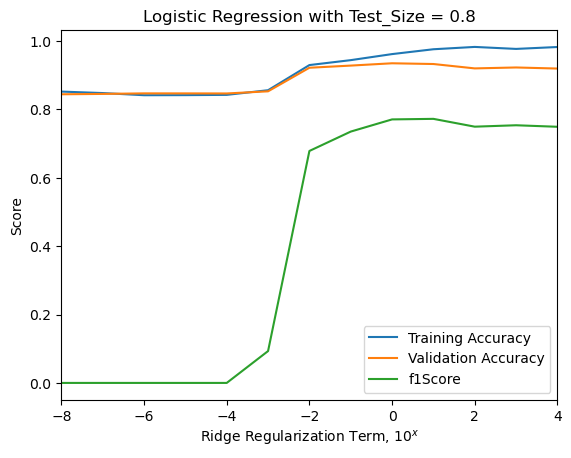

In [9]:
train_acc, val_acc, f1_scores, best_acc, best_lr_model = train_models(X, Y, lr_models, 0.8)
plt.title("Logistic Regression with Test_Size = 0.8")
plt.xlabel(r"Ridge Regularization Term, $10^x$")
plt.ylabel("Score")
plt.xlim([-8, 4])
plt.plot(np.linspace(-8, 4, 13), train_acc, label = 'Training Accuracy')
plt.plot(np.linspace(-8, 4, 13), val_acc, label = 'Validation Accuracy')
plt.plot(np.linspace(-8, 4, 13), f1_scores, label = 'f1Score')
plt.legend()
print(best_acc)

### Training Logistic Regression Models with test_size = 0.5

0.9487723552591695


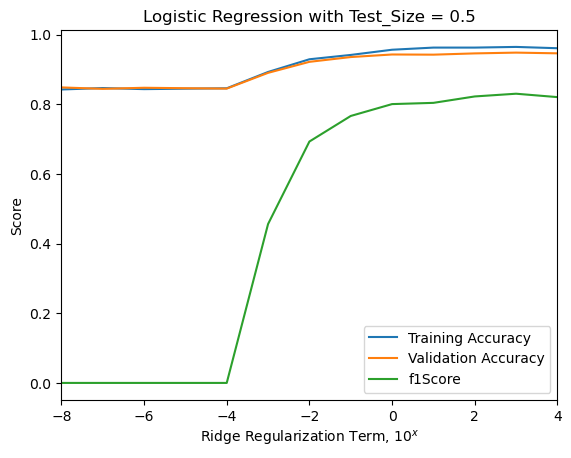

In [10]:
train_acc, val_acc, f1_scores, best_acc, best_lr_model = train_models(X, Y, lr_models, 0.5)
plt.title("Logistic Regression with Test_Size = 0.5")
plt.xlabel(r"Ridge Regularization Term, $10^x$")
plt.ylabel("Score")
plt.xlim([-8, 4])
plt.plot(np.linspace(-8, 4, 13), train_acc, label = 'Training Accuracy')
plt.plot(np.linspace(-8, 4, 13), val_acc, label = 'Validation Accuracy')
plt.plot(np.linspace(-8, 4, 13), f1_scores, label = 'f1Score')
plt.legend()
print(best_acc)

### Training Logistic Regression Models with test_size = 0.2

0.9522727272727273


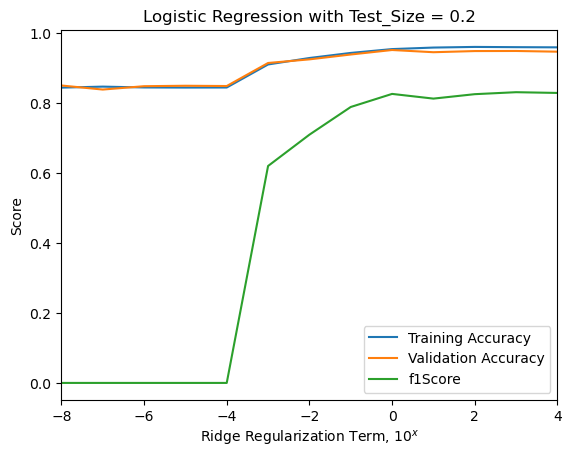

In [11]:
train_acc, val_acc, f1_scores, best_acc, best_lr_model = train_models(X, Y, lr_models, 0.2)
plt.title("Logistic Regression with Test_Size = 0.2")
plt.xlabel(r"Ridge Regularization Term, $10^x$")
plt.ylabel("Score")
plt.xlim([-8, 4])
plt.plot(np.linspace(-8, 4, 13), train_acc, label = 'Training Accuracy')
plt.plot(np.linspace(-8, 4, 13), val_acc, label = 'Validation Accuracy')
plt.plot(np.linspace(-8, 4, 13), f1_scores, label = 'f1Score')
plt.legend()
print(best_acc)

### Training SVM Models with test_size = 0.8

In [12]:
svm_labels = ['Linear', 'Poly2', 'Poly3', 'RBF-.001', 'RBF-.05', 'RBF-1']

0.9426659089474017


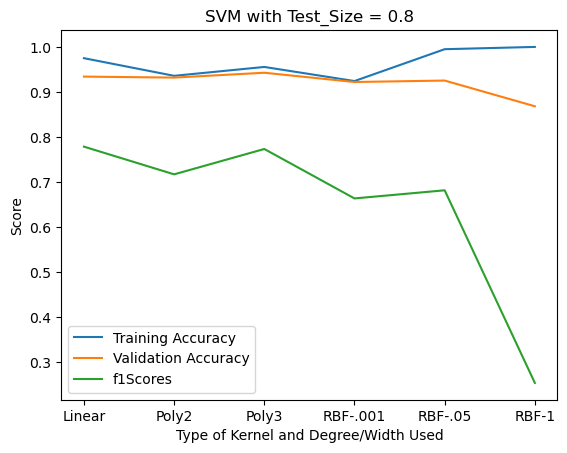

In [13]:
train_acc, val_acc, f1_scores, best_acc, best_svm_model = train_models(X, Y, svm_models, 0.8)
plt.title("SVM with Test_Size = 0.8")
plt.xlabel(r"Type of Kernel and Degree/Width Used")
plt.ylabel("Score")
plt.plot(svm_labels, train_acc, label = "Training Accuracy")
plt.plot(svm_labels, val_acc, label = "Validation Accuracy")
plt.plot(svm_labels, f1_scores, label = "f1Scores")
plt.legend()
print(best_acc)

### Training SVM Models with test_size = 0.5

0.966252399717086


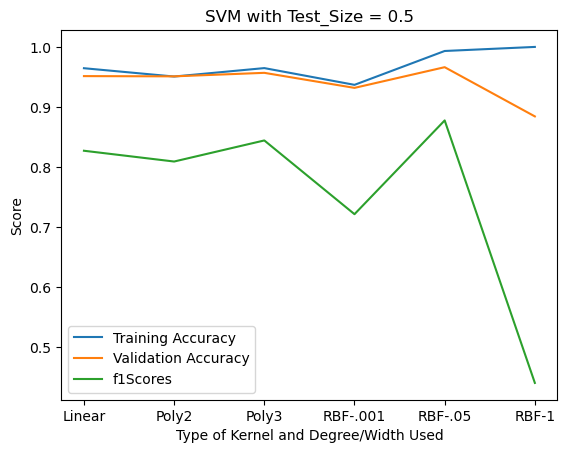

In [14]:
train_acc, val_acc, f1_scores, best_acc, best_svm_model = train_models(X, Y, svm_models, 0.5)
plt.title("SVM with Test_Size = 0.5")
plt.xlabel(r"Type of Kernel and Degree/Width Used")
plt.ylabel("Score")
plt.plot(svm_labels, train_acc, label = "Training Accuracy")
plt.plot(svm_labels, val_acc, label = "Validation Accuracy")
plt.plot(svm_labels, f1_scores, label = "f1Scores")
plt.legend()
print(best_acc)

### Training SVM Models with test_size = 0.2

0.9752525252525253


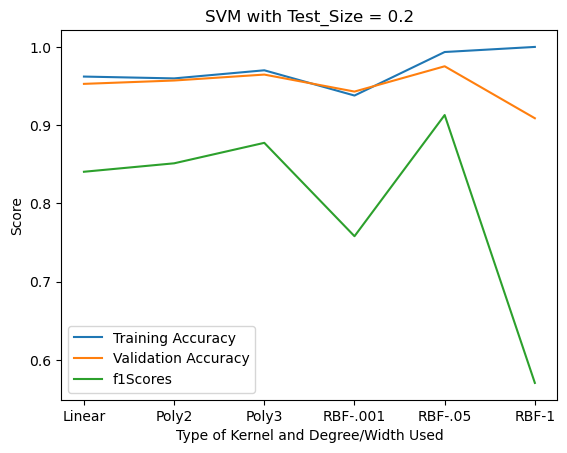

In [15]:
train_acc, val_acc, f1_scores, best_acc, best_svm_model = train_models(X, Y, svm_models, 0.2)
plt.title("SVM with Test_Size = 0.2")
plt.xlabel(r"Type of Kernel and Degree/Width Used")
plt.ylabel("Score")
plt.plot(svm_labels, train_acc, label = "Training Accuracy")
plt.plot(svm_labels, val_acc, label = "Validation Accuracy")
plt.plot(svm_labels, f1_scores, label = "f1Scores")
plt.legend()
print(best_acc)

### Training RF Models with test_size = 0.8

In [16]:
rf_splits = [1, 2, 4, 8, 12, 16, 20]

0.9549157037317674


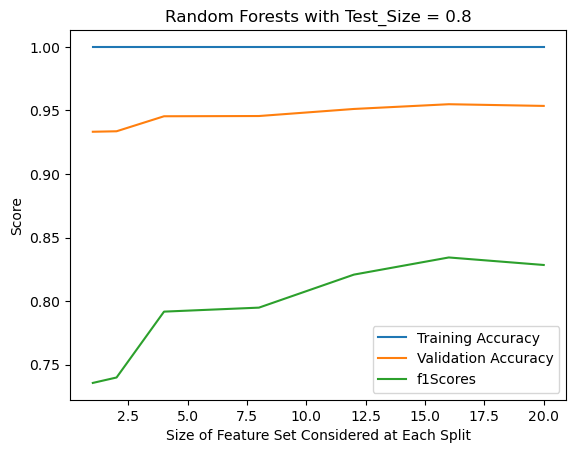

In [17]:
train_acc, val_acc, f1_scores, best_acc, best_rf_model = train_models(X, Y, rf_models, 0.8)
plt.title("Random Forests with Test_Size = 0.8")
plt.xlabel(r"Size of Feature Set Considered at Each Split")
plt.ylabel("Score")
plt.plot(rf_splits, train_acc, label = "Training Accuracy")
plt.plot(rf_splits, val_acc, label = "Validation Accuracy")
plt.plot(rf_splits, f1_scores, label = "f1Scores")
plt.legend()
print(best_acc)

### Training RF Models with test_size = 0.5

0.9733252500757805


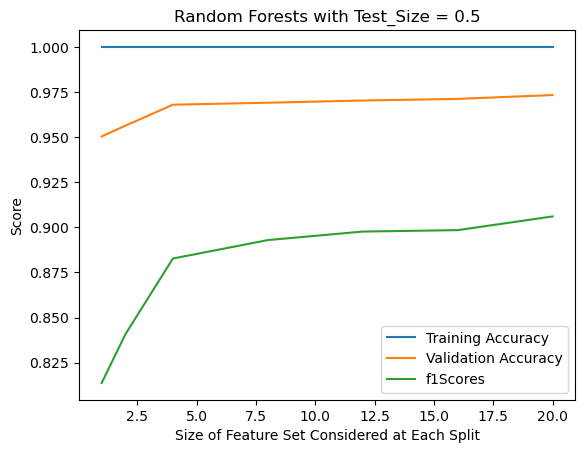

In [18]:
train_acc, val_acc, f1_scores, best_acc, best_rf_model = train_models(X, Y, rf_models, 0.5)
plt.title("Random Forests with Test_Size = 0.5")
plt.xlabel(r"Size of Feature Set Considered at Each Split")
plt.ylabel("Score")
plt.plot(rf_splits, train_acc, label = "Training Accuracy")
plt.plot(rf_splits, val_acc, label = "Validation Accuracy")
plt.plot(rf_splits, f1_scores, label = "f1Scores")
plt.legend()
print(best_acc)

### Training RF Models with test_size = 0.2

0.9775252525252526


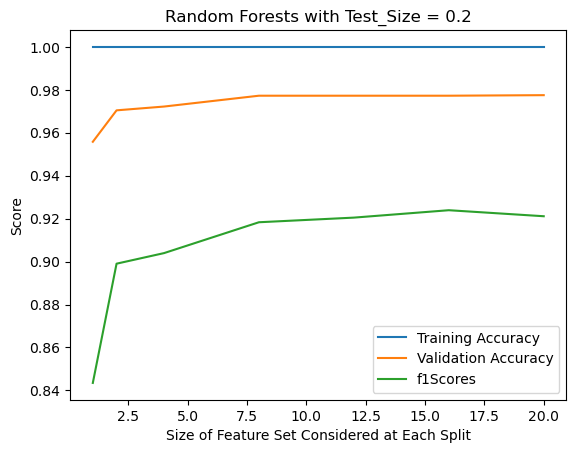

In [19]:
train_acc, val_acc, f1_scores, best_acc, best_rf_model = train_models(X, Y, rf_models, 0.2)
plt.title("Random Forests with Test_Size = 0.2")
plt.xlabel(r"Size of Feature Set Considered at Each Split")
plt.ylabel("Score")
plt.plot(rf_splits, train_acc, label = "Training Accuracy")
plt.plot(rf_splits, val_acc, label = "Validation Accuracy")
plt.plot(rf_splits, f1_scores, label = "f1Scores")
plt.legend()
print(best_acc)

Accuracies:
logistic regression: 0.9545454545454546
 SVM: 0.9871212121212121 Random Forests: 0.9946969696969697
f1Scores:
logistic regression: 0.8543689320388349
 SVM: 0.9590361445783132 Random Forests: 0.9836065573770492


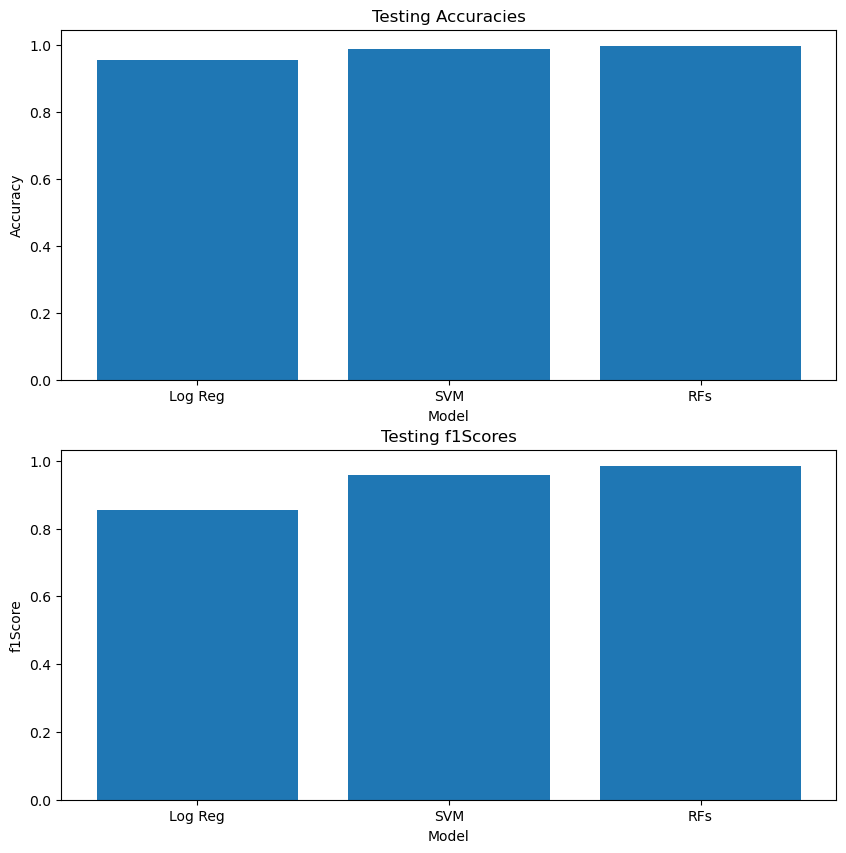

In [20]:
from sklearn.model_selection import train_test_split
_, testX, _, testY = train_test_split(X, Y, test_size = 0.2)
eval_models(best_lr_model, best_svm_model, best_rf_model, testX, testY)